<a href="https://colab.research.google.com/github/kristinalubinets/Python-Midterm/blob/main/Covid-19_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>COVID-19 Data Analysis</h3>

**<h1>TASK 1: Environment Set up.</h1>**

     Today we will work with an ingest data from the latest 'New York Times' county-level COVID-19 database (provided on GitHub).
     For the work with Data we are going to use Google Colab and submit our analysis on GitHub as a final work.

    The variable 'datacovid' represents our Data Collection:

    datacovid =  pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

**<h1>TASK 2: Data Collection</h1>**

    First we should take a broad look at our dataframe:
    It consists of 930253 rows × 6 columns (date, county, state, fips, cases deaths). 
    And import needed python libraries, such as Numpy and Pandas.

In [ ]:
import numpy as np
import pandas as pd
datacovid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

#to describe the data and the exact amount of rows and colunms
datacovid.describe       #there are a lot of missing data

#We can notice that the Data Collection has missing information (NaN) in 2 of the 6 columns:
datacovid.isnull().sum()
datacovid

#But for now we should choose a specific county (in NY state) for the analysis:

df = datacovid[datacovid['state'] == 'New York']
df
df1 = df[df['county']=='Orange']
df1

**<h1>TASK 3: Data Wrangling and EDA (Exploratory Data Analysis)</h1>**

    Once we selected a county we should go through the data set to clean and sort it (wrangling). 
    And then we research / summarize needed characteristics (EDA)

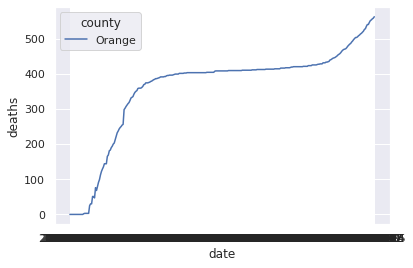

In [19]:
#First we should check through the data set if we have any missing values (NaN) in all 6 rows

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

datacovid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

df = datacovid[datacovid['state'] == 'New York']
df1 = df[df['county']=='Orange']

#Now we can estimate SUMs of needed columns such as Cases and Deaths in NY county Orange:

orange_cases = df1.groupby(['county'])['cases'].sum()
orange_deaths = df1.groupby(['county'])['deaths'].sum()

#And find median and mean of the cases and deaths:
median_cases = df1['cases'].median()
median_cases                                # median cases = 11228.5
median_deaths = df1['deaths'].median()
median_deaths                               #median deaths = 408.0

#To find what is the mean value of cases or deaths we will use :
mean_cases = df1['cases'].mean()            # mean cases = 11963.554..         see the difference with median cases
mean_cases
mean_deaths = df1['deaths'].mean()
mean_deaths                                 # mean deaths = 360.490            see the difference with median deaths

#The plot below shows the relation between date and deaths - thus, the amount of deaths was rapidly icreasing in the beggining of the year (1/5 of the year) 
#                                                            from 0 deaths to ~ 400 deaths, but THEN roughly about 3/5 of the year was stayng stable at the mark 400.
#                                                            Closer to the end of the year about 1/5 of it was rapidly increasing again from the 400 deaths to almost 600.

sns.set(rc={'figure.figsize':(6,4)})
sns.lineplot(x="date", y="deaths", hue="county", data=df1) 
#The last plot visualize the relationship between cases and death so that we can notice again the behavier of the plot at the mark 400 - 500 deaths : 
sns.lineplot(x="cases", y="deaths", hue="county", data=df1) 


**<h1>TASK 4: Understand NY Covid 19 data in last 30 days</h1>**

    Get the data in the needed period of time - 30 days and analyze it, use plots to visualize the result.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


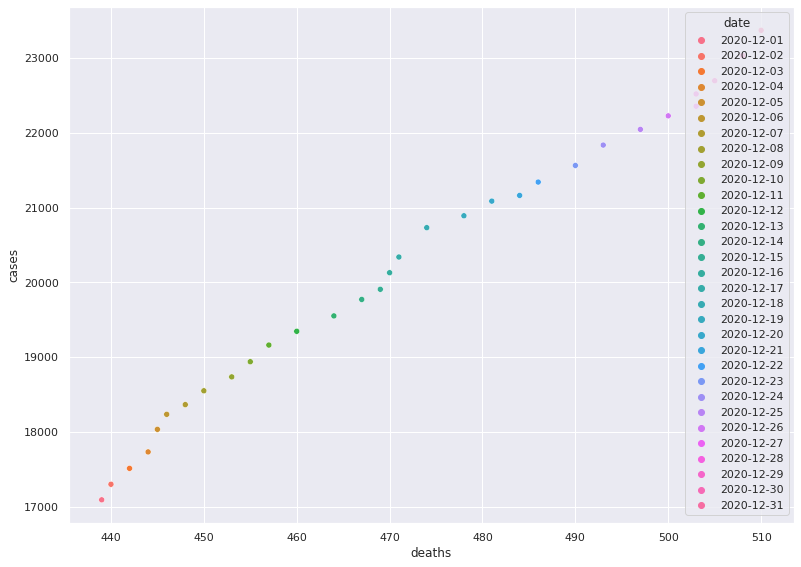

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")

datacovid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

df = datacovid[datacovid['state'] == 'New York']
df1 = df[df['county']=='Orange']

#The list below shows the data set for 30 days period in the NY state Orange county:
dec_data = df1[(df1['date'] >= '2020-12-01') & (df['date'] <= '2020-12-31')]
dec_data

#In the list above we have 3 colums that represent the same values, that is why we can remove (drop) them to see clearer list of data:
dec_data1 = dec_data.drop(['fips', 'state', 'county'], axis=1)
dec_data1                                                 #From the list above we can see that the death cases grow up from 439 in the first day of
#                                                         December to 510 at the end of the month this can represent that rapidly increasing curve 
#                                                         (at the end of the year) we plotted in the Task 2.                                                    

sns.set(rc={'figure.figsize':(13,9.5)})                                   
sns.scatterplot(data=dec_data1, x="deaths", y="cases", hue="date")        


    The last plot emphisizes the growth of deaths and cases in December, thus, at the beggining of the month the amount of cases is around 17 000 
    and it increases in about 35% closer to the end of December. We can observe the similar mark of deaths' growth, from ~ 440 at the beggining
    of the month to ~510 at the end.


**<h1>TASK 5: Comparing Covid 19 data with different states</h1>**

    In this task we will compare the SUMs of cases and deaths in different 

In [59]:
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

datacovid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

df = datacovid.groupby(['state']).agg({'cases':'sum','deaths':'sum'})         #The data collection shows the sum of all cases and deaths per each county   

mean_cases = df['cases'].mean()                                                # We can find mean values of cases and deaths so that we can compare it with the 
mean_deaths = df['deaths'].mean()                                              # list of suggested counties.

#df['mean-deaths'] = mean_deaths                                               # We can add mean deaths and cases values to the data list if it's neded, but in this case 
#df['mean-cases'] = mean_cases                                                 # we will not do it to avoid crowding.

df['diff_in_cases'] = df['cases'] - mean_cases
df['diff_in_deaths'] = df['deaths'] - mean_deaths
df


,cases,deaths,diff_in_cases,diff_in_deaths
state,,,,
Alabama,38120532,605322.0,735892.8,-3.390653e+05
Alaska,3592157,16333.0,-33792482.2,-9.280543e+05
Arizona,56132043,1197110.0,18747403.8,2.527227e+05
Arkansas,22128650,345418.0,-15255989.2,-5.989693e+05
California,214602947,3502856.0,177218307.8,2.558469e+06
Colorado,28788944,620613.0,-8595695.2,-3.237743e+05
Connecticut,20287924,1214453.0,-17096715.2,2.700657e+05
Delaware,6106398,160100.0,-31278241.2,-7.842873e+05
District of Columbia,4111779,158581.0,-33272860.2,-7.858063e+05


    The list above discribes the avarege amount of cases and deaths in different sates, two additional columns 'diff_in_cases' and 'diff_in_deaths'
    estimate the deviations from the mean values per state.
    
    Thus, we can select any of states to see the difference from the averege, for instance, the greatest difference from the mean value of cases have 
    such states as California (177 218 307.8), Texas, and New York. 
    Or that the states with negative difference from the averege cases are Virgin Islands (-37 137 209.2), Vermont, and Guam.
    Thus, the greatest difference from the mean deaths has New York sate (7.959497) ~ 8 deaths. And the least has Norht Carolina (-9.926331) ~ 10 deaths.

**<h1>TASK 6: Conclusion</h>**

    From the data analysis we can concluse that:
*   The cases of covid were rapidly increasing at the beggining and the end of the year (possible influence of cold weather that works in the same way with flu).
*   The states with the highest amount of cases not necessary have the highest amount of deaths, that was shown on the example of California state.
*   Similarly, the states with the lowest amount of cases not necessary have the lowest amount of deaths (for instace, Virgin Island that we studied in the previous Task).
*   A state with the greatest popularity in the USA - California, has the higest amount of covid cases. Thus, Virgin Islands state is least populated state and has the lowest amount of cases. Nevertheless, the least amount of deaths happend in North Carolina state.

